# Data Preprocessing



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Matches_clean.csv to Matches_clean.csv


In [ ]:
import pandas as pd
data = pd.read_csv('Matches_clean.csv')
data.head()

,Unnamed: 0,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,umpire1,umpire2
0,0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,Asad Rauf,RE Koertzen
1,1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,MR Benson,SL Shastri
2,2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,Aleem Dar,GA Pratapkumar
3,3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,SJ Davis,DJ Harper
4,4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,BF Bowden,K Hariharan


## Data Cleaning

Some of the teams in the data were renamed. Thus, there is a repetition.

In [ ]:
ActualNames = ['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions', 'Rising Pune Supergiant', 'Royal Challengers Bangalore', 'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
    'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants', 'Delhi Capitals']

ChangedNames = ['SRH','MI','GL','RPS','RCB','KKR','DC','KXIP','CSK','RR','SRH','KTK','PW','RPS','DC']
data.replace(ActualNames, ChangedNames, inplace = True)

### Identify Columns That Contain a Single Value 

" When a predictor contains a single value, we call this a zero-variance predictor because there truly is no variation displayed by the predictor. "

These columns may or may not contribute to the skill of a model. We can’t assume that they are useless to modeling.

In [ ]:
for col in data:
  print(col, len(data[col].unique()))

Unnamed: 0 780
id 780
city 33
date 579
player_of_match 230
venue 36
neutral_venue 2
team1 12
team2 12
toss_winner 12
toss_decision 2
winner 12
result 2
result_margin 91
umpire1 48
umpire2 46


* Our model does not have any column with single value. Columns neutral_venue, toss_decision, and result have binary values that is why they have only 2 unique values.

### Consider Columns That Have Very Few Unique Values

Depending on the choice of data preparation and modeling algorithms, variables with very few numerical values can also cause errors or unexpected results.

In [ ]:
for col in data:
  num = len(data[col].unique())
  percentage = float(num) / data.shape[0] * 100
  print(col, num, percentage)

Unnamed: 0 780 100.0
id 780 100.0
city 33 4.230769230769231
date 579 74.23076923076923
player_of_match 230 29.48717948717949
venue 36 4.615384615384616
neutral_venue 2 0.2564102564102564
team1 12 1.5384615384615385
team2 12 1.5384615384615385
toss_winner 12 1.5384615384615385
toss_decision 2 0.2564102564102564
winner 12 1.5384615384615385
result 2 0.2564102564102564
result_margin 91 11.666666666666666
umpire1 48 6.153846153846154
umpire2 46 5.897435897435897


#### Finding columns with less than 1 percentage of unique values

In [ ]:
for col in data:
  num = len(data[col].unique())
  percentage = float(num) / data.shape[0] * 100
  if percentage < 1:
    print(col, num, percentage)

neutral_venue 2 0.2564102564102564
toss_decision 2 0.2564102564102564
result 2 0.2564102564102564


These columns will require further attention while developing models.

### Finding Columns That Have A Low Variance

In [ ]:
# DISCUSS

### Identify Row That Contain Duplicate Data

" Data deduplication, also known as duplicate detection, record linkage, record matching, or entity resolution, refers to the process of identifying tuples in one or more relations that refer to the same real-world entity. "

In [ ]:
duplicates = data.duplicated()
print(duplicates.any())

False


* Our data does not have any duplicate rows.

# Exploratory Data Analysis

## Univariate Analysis

In Univariate Analysis, we study individual characteristics of every feature/variable available in the dataset. There are two types of features – Continuous and Categorical.

### Categorical Variable

In [ ]:
def plot_categorical_variable(data, group):
  group_size = len(group)
  plt.figure(figsize=(8 * group_size, 7))

  for j, i in enumerate(group):
    norm_count = data[i].value_counts(normalize=True)
    n_uni = data[i].unique()

    plt.subplot(1, group_size, j+1)
    graph = sns.countplot(y=i, data=data, order=data[i].value_counts().index, palette="Set2")
    for p in graph.patches:
      graph.annotate(s='{:.0f}'.format(p.get_width()), xy=(p.get_width()+0.1, p.get_y()+0.7))
    plt.xlabel('fraction/percent', fontsize=20)
    plt.ylabel('{}'.format(i), fontsize=20)
    plt.title('n_uniques = {}\n value counts \n {};'.format(n_uni, norm_count))

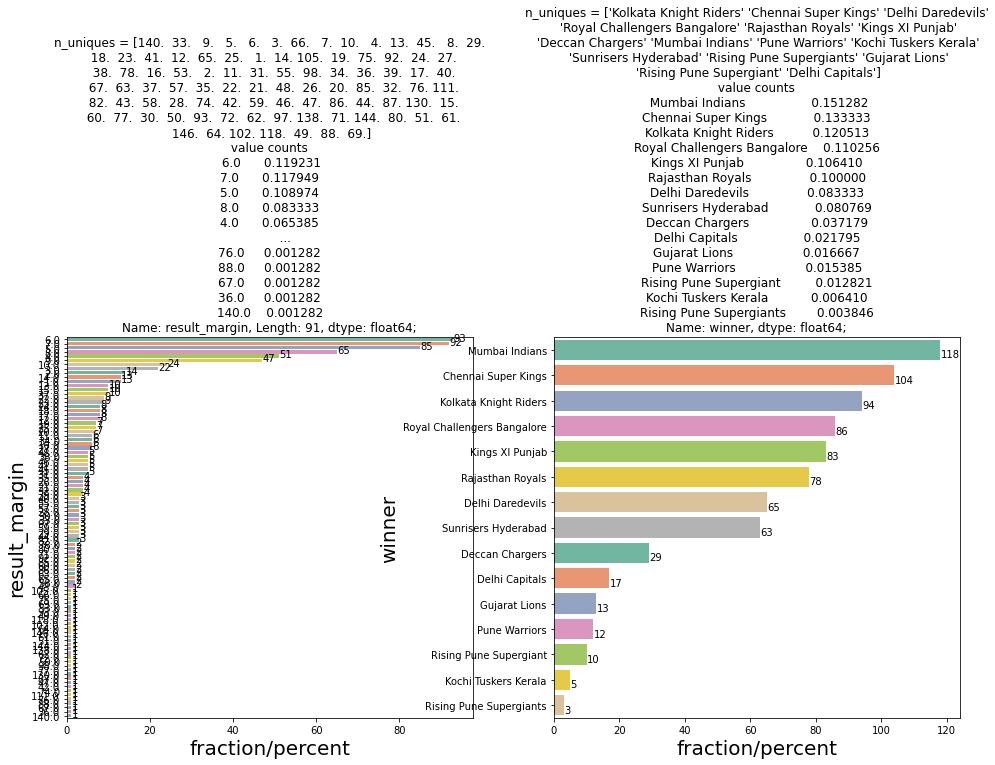

In [ ]:
plot_categorical_variable(data, ['result_margin', 'winner'])

## Bivariate Analysis

In [ ]:
def biv_analysis(data, feature1, feature2):
  pivot = data.pivot_table(index=feature1, values=feature2, aggfunc=np.mean)
  plt.figure(figsize=(15,6), dpi=140)
  plt.subplot(1,2,1)
  sns.barplot(x=feature1, y=feature2, data=data, palette="Set2", ci=None)
  plt.title("{} And {} Analysis".format(feature1, feature2))
  plt.ylabel("Average {}".format(feature2))
  plt.subplot(1,2,2)
  sns.boxplot(x=feature1, y=feature2, data=data, palette="Set3")
  plt.title('{} boxplot'.format(feature1))

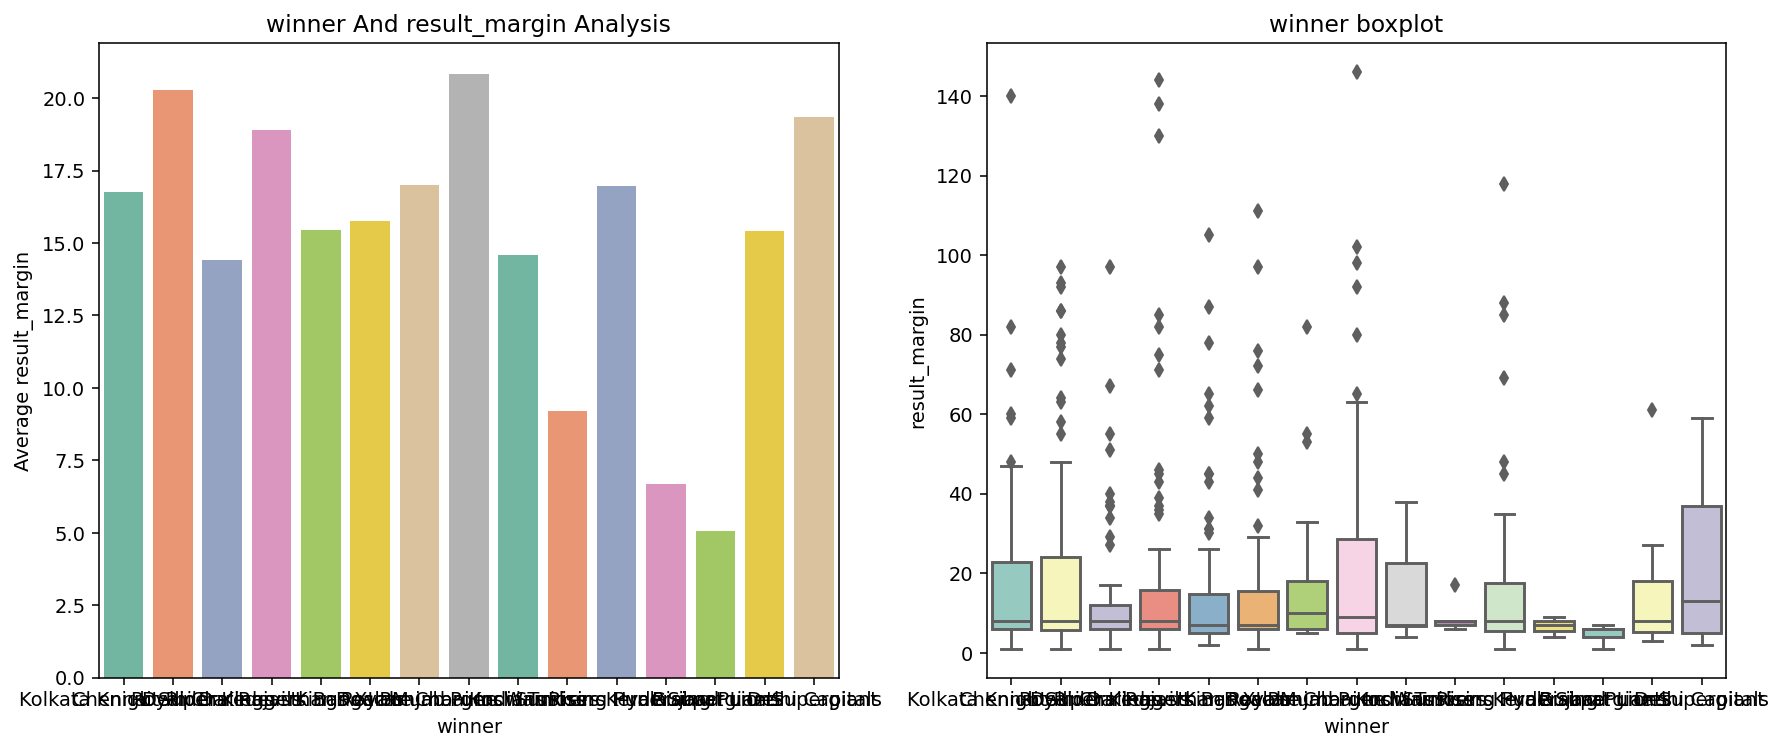

In [ ]:
biv_analysis(data, 'winner', 'result_margin')